### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
os.chdir('/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/analysis/tune_scan/')
#sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



### 30 cm


In [2]:
# Define study
STUDY_NAME = "tune_scan_30cm_correct_scheme"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)


df

normalized amplitude in xy-plane  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy     i_oct_b1                                     
lhcb1 base_collider      1.150000e+11            160.0          62.305 60.309 300.0                                4.500   
                                                                       60.310 300.0                                4.500   
                                                                       60.311 300.0                                4.500   
                                                                       60.312 300.0                                4.500   
                                                                       60.313 300.0                                4.531   
...                                                                                                                  ...   
                                                                62.323 60.328 300.0                                4.500   
                                                                       60.329 300.0                                4.500   
                                                                62.324 60.328 300.0                                4.500   
                                                                       60.329 300.0                                4.500   
                                                                62.325 60.329 300.0                                4.500   

                                                                                            qx  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy     i_oct_b1           
lhcb1 base_collider      1.150000e+11            160.0          62.305 60.309 300.0     62.305   
                                                                       60.310 300.0     62.305   
                                                                       60.311 300.0     62.305   
                                                                       60.312 300.0     62.305   
                                                                       60.313 300.0     62.305   
...                                                                                        ...   
                                                                62.323 60.328 300.0     62.323   
                                                                       60.329 300.0     62.323   
                                                                62.324 60.328 300.0     62.324   
                                                                       60.329 300.0     62.324   
                                                                62.325 60.329 300.0     62.325   

                                                                                            qy  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy     i_oct_b1           
lhcb1 base_collider      1.150000e+11            160.0          62.305 60.309 300.0     60.309   
                                                                       60.310 300.0     60.310   
                                                                       60.311 300.0     60.311   
                                                                       60.312 300.0     60.312   
                                                                       60.313 300.0     60.313   
...                                                                                        ...   
                                                                62.323 60.328 300.0     60.328   
                                                                       60.329 300.0     60.329   
                                                                62.324 60.328 300.0     60.328   
                                                                       60.329 300.0     60.329   
                        

In [3]:
# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,...,62.316,62.317,62.318,62.319,62.320,62.321,62.322,62.323,62.324,62.325
qy,,,,,,,,,,,,,,,,,,,,,
60.309,4.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.310,4.500,4.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.311,4.500,4.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.312,4.500,4.781,4.969,5.000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.313,4.531,4.875,4.969,4.656,4.781,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.314,4.688,NaN,4.969,4.938,4.844,4.594,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.315,4.719,4.906,4.906,4.938,NaN,4.844,5.125,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.316,4.562,NaN,NaN,NaN,NaN,4.875,4.812,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.317,4.688,4.875,4.875,4.781,4.844,4.594,NaN,4.719,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


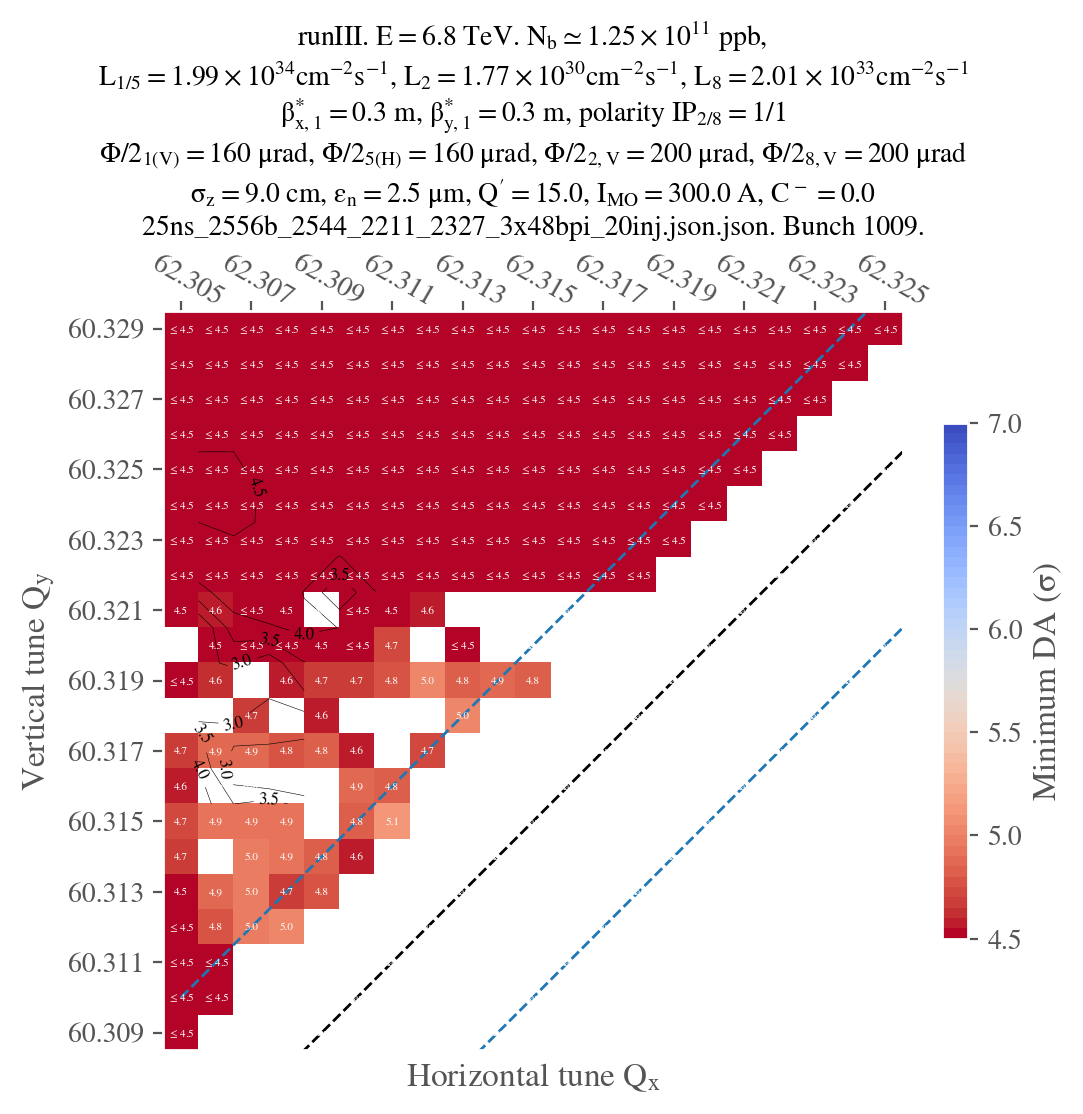

In [4]:

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = True,
    green_contour = 5.5,
    extended_diagonal=False,
    vmin = 4.5,
    vmax = 7,
)
if SAVE_STUDY_EOS:
    path_archive, path_EOS = analysis_functions.copy_study_on_eos(STUDY_NAME)
    #analysis_functions.archive_and_clean(path_archive, path_EOS)